In [4]:
import numpy as np
import matplotlib.pylab as plt

In [5]:
x = np.linspace(0, 100)
y = np.sin(x)

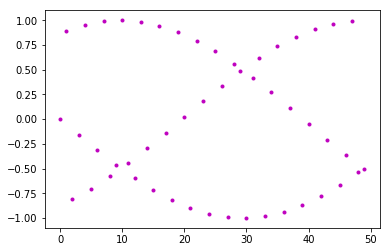

In [6]:
plt.plot(y, 'm.')

In [ ]:
y.shp